# k-Means Clustering

In [2]:
#import all relevant libraries here.
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt



## k-Means at a glance

The *k*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.
It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the *k*-means model.
We will soon dive into exactly *how* the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the *k*-means result.

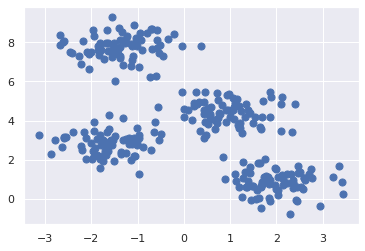

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

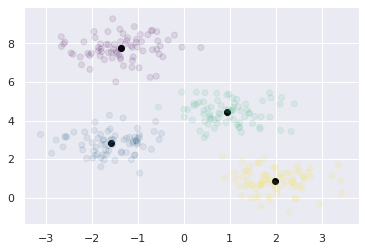

In [30]:
# function to get initial centroids
def get_init_centroids(k):

    # get the number of rows in X
    n_rows = X.shape[0]

    # get the indices of 2 random rows
    random_indices = np.random.choice(n_rows, size=k, replace=False)

    # extract rows from the indices obtained (x and y value for the centroid)
    init_centroids = X[random_indices, :]
    return init_centroids


# assigning initial centroids found in the function to a list
centroids = get_init_centroids(4)


# function for distance calculation (Euclidean distance)
def calc_distance(point1, point2):
    return np.linalg.norm(point1 - point2)


# function to find closest centroid to each point
def find_closest_centroids(initial_centroids, X):
    # empty list to append assigned centroids
    assigned_centroid = []
    for i in X:
        # empty lists to append distance of each points from each centroids
        distance=[]
        for j in initial_centroids:
            # appending distance of every point from every centroid calculated with previously defined function
            distance.append(calc_distance(i, j))
        # checking the minimum distance and appending the index (representing the centroid) to a list
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid


# assignin point to a cluster
get_centroids = find_closest_centroids(centroids, X)

# function to update the centroids
def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

# repeating steps 10 times to get optimal result
for i in range(10):
    get_centroids = find_closest_centroids(centroids, X)
    centroids = calc_centroids(get_centroids, X)

plt.figure()
plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
plt.scatter(X[:, 0], X[:, 1], alpha=0.1, c=get_centroids, cmap='viridis')
plt.show()
